In [1]:
## Based on
#  - Pomegranate content:
#    * https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_1_Distributions.ipynb
#  - Bayesian Network tutorials:
#    * https://www.edureka.co/blog/bayesian-networks/
#    * https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4_Bayesian_Networks.ipynb

## First look at distributions

In [2]:
## Install as needed
#!pip install pomegranate

In [3]:
# Imports and setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy

from pomegranate import *


In [4]:
numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

In [5]:
# Normal with mean 5 and s.d. = 2
d1 = NormalDistribution(5, 2)
print (d1)

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        5.0,
        2.0
    ],
    "frozen" : false
}


In [6]:
# Learns distribution parameters
d2 = NormalDistribution.from_samples([3, 4, 5, 6, 7])
print (d2)

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        5.0,
        1.4142135623730951
    ],
    "frozen" : false
}


In [7]:
# Another way for larger data
x = numpy.random.normal(10, 1, size=100)

d3 = NormalDistribution.from_samples(x)
print (d3)

{
    "class" : "Distribution",
    "name" : "NormalDistribution",
    "parameters" : [
        10.05980801553448,
        1.0078822447166023
    ],
    "frozen" : false
}


In [8]:
# Find probability for a value v
v = 10
print (d1.probability(v), d3.probability(v))

0.008764150246787767 0.3951260267987932


In [9]:
d2 = ExponentialDistribution(5)
d3 = LogNormalDistribution(2, 0.4)

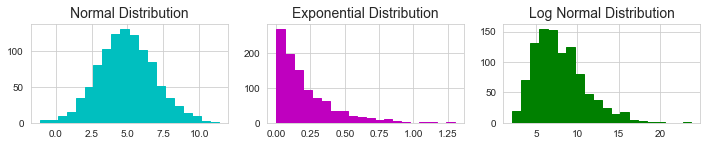

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(231)
plt.title("Normal Distribution", fontsize=14)
d1.plot(1000, edgecolor='c', color='c', bins=20)

plt.subplot(232)
plt.title("Exponential Distribution", fontsize=14)
d2.plot(1000, edgecolor='m', color='m', bins=20)

plt.subplot(233)
plt.title("Log Normal Distribution", fontsize=14)
d3.plot(1000, edgecolor='g', color='g', bins=20)

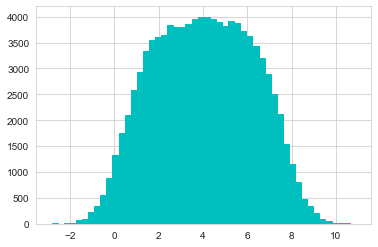

In [11]:
## Kernel Density functions

d = GaussianKernelDensity( [1, 2, 3, 4, 5, 6, 7], bandwidth=1 )
d.plot(n=100000, edgecolor='c', color='c', bins=50)
plt.show()

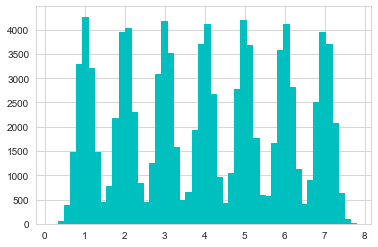

In [12]:
d = GaussianKernelDensity( [1, 2, 3, 4, 5, 6, 7], bandwidth=0.2)
d.plot(n=100000, edgecolor='c', color='c', bins=50)
plt.show()

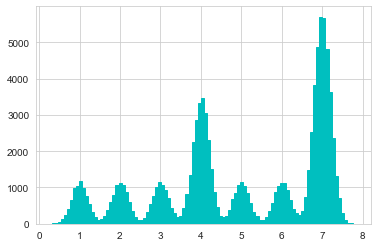

In [13]:
d = GaussianKernelDensity( [1, 2, 3, 4, 5, 6, 7], weights=[1, 1, 1, 3, 1, 1, 5], bandwidth=0.2 )
d.plot( n=100000, edgecolor='c', color='c', bins=100 )

## Now build a Bayesian model and reason with it

In [14]:
## See more details at:
# - https://github.com/jmschrei/pomegranate/blob/master/tutorials/B_Model_Tutorial_4_Bayesian_Networks.ipynb
    
# Initially the door selected by the guest is completely random
guest = DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
 
# The door containing the prize is also a random process
prize = DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
 

In [15]:
# The door Monty picks, depends on the choice of the guest and the prize door
# Format: P(Monty='A'|Guest='B', Prize='C').

monty = ConditionalProbabilityTable(
    [[ 'A', 'A', 'A', 0.0 ],
    [ 'A', 'A', 'B', 0.5 ],
    [ 'A', 'A', 'C', 0.5 ],
    [ 'A', 'B', 'A', 0.0 ],
    [ 'A', 'B', 'B', 0.0 ],
    [ 'A', 'B', 'C', 1.0 ],
    [ 'A', 'C', 'A', 0.0 ],
    [ 'A', 'C', 'B', 1.0 ],
    [ 'A', 'C', 'C', 0.0 ],

    [ 'B', 'A', 'A', 0.0 ],
    [ 'B', 'A', 'B', 0.0 ],
    [ 'B', 'A', 'C', 1.0 ],
    [ 'B', 'B', 'A', 0.5 ],
    [ 'B', 'B', 'B', 0.0 ],
    [ 'B', 'B', 'C', 0.5 ],
    [ 'B', 'C', 'A', 1.0 ],
    [ 'B', 'C', 'B', 0.0 ],
    [ 'B', 'C', 'C', 0.0 ],

    [ 'C', 'A', 'A', 0.0 ],
    [ 'C', 'A', 'B', 1.0 ],
    [ 'C', 'A', 'C', 0.0 ],
    [ 'C', 'B', 'A', 1.0 ],
    [ 'C', 'B', 'B', 0.0 ],
    [ 'C', 'B', 'C', 0.0 ],
    [ 'C', 'C', 'A', 0.5 ],
    [ 'C', 'C', 'B', 0.5 ],
    [ 'C', 'C', 'C', 0.0 ]], 
    
    [guest, prize] )
 

In [16]:
# State objects hold both the distribution, and a high level name.
s1 = State( guest, name="guest" )
s2 = State( prize, name="prize" )
s3 = State( monty, name="monty" )

In [17]:
# Create the Bayesian network object with a useful name
model = BayesianNetwork("Monty Hall Problem")

# Add the three states to the network 
model.add_states(s1, s2, s3)

In [18]:
# Edges are added from parent -> child by calling model.add_edge(parent, child).
model.add_edge(s1, s3)
model.add_edge(s2, s3)

In [19]:
# Final step in graph building
model.bake()

In [20]:
# Now predicting
#  Case: Guest said door A, Monty then opened door B, but that the actual car was behind door C
model.probability([['A', 'B', 'C']])

0.11111111111111109

In [21]:
# Passing in a dictionary of values, where the key is the name of the state and the value is the 
#  observed value for that state. If we don't supply any values, we get the marginal of the graph, 
#  which is just the frequency of each value for each variable over an infinite number of randomly 
#  drawn samples from the graph.
model.predict_proba({})

array([{
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "A" : 0.33333333333333337,
                   "B" : 0.33333333333333337,
                   "C" : 0.33333333333333337
               }
           ],
           "frozen" : false
       }                                     ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "A" : 0.33333333333333337,
                   "B" : 0.33333333333333337,
                   "C" : 0.33333333333333337
               }
           ],
           "frozen" : false
       }                                     ,
       {
           "class" : "Distribution",
           "dtype" : "str",
           "name" : "DiscreteDistribution",
           "parameters" : [
               {
                   "C" : 

In [22]:
# Guest has chosen door 'A'. Gift can be behind any while
#  Monty wil only call between B and C equi-probably
model.predict_proba([['A', None, None]])

/Users/biplavs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


[array(['A', {
                 "class" : "Distribution",
                 "dtype" : "str",
                 "name" : "DiscreteDistribution",
                 "parameters" : [
                     {
                         "A" : 0.3333333333333333,
                         "B" : 0.3333333333333333,
                         "C" : 0.3333333333333333
                     }
                 ],
                 "frozen" : false
             }                                    ,
        {
            "class" : "Distribution",
            "dtype" : "str",
            "name" : "DiscreteDistribution",
            "parameters" : [
                {
                    "C" : 0.49999999999999983,
                    "A" : 0.0,
                    "B" : 0.49999999999999983
                }
            ],
            "frozen" : false
        }                                     ], dtype=object)]

In [23]:
# One syntax
model.predict_proba([{'guest': 'A', 'monty': 'C'}])

[array(['A', {
                 "class" : "Distribution",
                 "dtype" : "str",
                 "name" : "DiscreteDistribution",
                 "parameters" : [
                     {
                         "A" : 0.3333333333333334,
                         "B" : 0.6666666666666664,
                         "C" : 0.0
                     }
                 ],
                 "frozen" : false
             }                                    , 'C'], dtype=object)]

In [24]:
# Another syntax
model.predict_proba([['A', None, 'C']])

/Users/biplavs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


[array(['A', {
                 "class" : "Distribution",
                 "dtype" : "str",
                 "name" : "DiscreteDistribution",
                 "parameters" : [
                     {
                         "A" : 0.3333333333333334,
                         "B" : 0.6666666666666664,
                         "C" : 0.0
                     }
                 ],
                 "frozen" : false
             }                                    , 'C'], dtype=object)]